# Data processing

In [12]:
import pandas as pd

features_dir = '/kaggle/input/music-av-features-dataset/features/audio_features.csv'
features = pd.read_csv(features_dir)

annotations_dir = '/kaggle/input/music-av-features-dataset/features/static_annotations.csv'
static_annotations = pd.read_csv(annotations_dir)


features

,energy,tempo,loudness,acousticness,chroma,spectral_centroid,spectral_bandwidth,zero_crossing_rate,mfcc_1,mfcc_2,...,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,id
0,0.286908,[95.703125],0.305295,7854.362237,0.440963,3579.172193,3785.392024,0.074712,-74.71160,119.23297,...,-22.728302,34.965530,-20.018837,20.464100,-6.147996,15.389832,3.582914,14.724852,0.861408,326.mp3
1,0.191791,[117.45383523],0.199056,3908.570369,0.448882,1963.588834,2520.127572,0.041839,-147.99565,164.92612,...,5.423412,26.132809,-1.227651,18.030407,2.476282,3.966422,3.728141,0.091601,1.877452,149.mp3
2,0.251878,[123.046875],0.275438,7005.372203,0.476814,3259.889380,3408.585762,0.077940,-85.40206,125.98122,...,-23.223692,30.223864,-13.202574,14.446476,-8.877033,8.302624,-5.236345,3.468456,1.430424,938.mp3
3,0.175653,[74.89809783],0.207107,5604.930107,0.409658,2449.405136,3127.395923,0.046086,-161.74814,144.96812,...,-25.037502,20.707117,-11.448624,5.518810,-1.073546,0.086110,0.280001,0.824423,-0.624271,434.mp3
4,0.252284,[126.04801829],0.285371,7949.234347,0.502569,3805.952253,3769.210907,0.091269,-111.04669,113.70817,...,-21.513102,29.365744,-15.605864,19.540688,-10.949041,8.507413,-2.720438,7.985794,-0.212425,928.mp3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,0.097041,[93.96306818],0.106805,6662.251311,0.648338,2723.226183,3557.463701,0.045443,-224.31851,120.67267,...,0.840486,50.489464,0.692322,17.566826,6.756074,11.139514,0.237706,3.668544,5.510532,334.mp3
790,0.125524,[79.50721154],0.132618,6102.942095,0.396932,2807.853347,3428.388774,0.061423,-142.04779,153.49810,...,-23.416895,31.169874,-18.936140,18.932250,-14.553457,6.422280,-9.006436,5.346796,-3.321376,886.mp3
791,0.222416,[112.34714674],0.236677,5581.958493,0.312036,2617.427259,3165.585139,0.053996,-130.62721,149.34492,...,-12.907167,28.119404,-21.688120,24.225100,-6.998311,1.724860,5.966913,-0.113034,2.377833,32.mp3
792,0.313621,[120.18531977],0.336095,8468.520760,0.529764,4182.254866,3801.830855,0.099652,-82.04321,97.01051,...,-20.592798,40.141823,-9.000351,26.101242,-3.972637,15.652220,-1.223954,3.471149,-2.564498,500.mp3


In [13]:
static_annotations

,musicId,Arousal(mean),Valence(mean)
0,1,0.4000,0.5750
1,4,0.2625,0.2875
2,5,0.1500,0.2000
3,6,0.5125,0.3500
4,7,0.7000,0.7250
...,...,...,...
762,993,0.8625,0.7625
763,996,0.8750,0.5625
764,997,0.7125,0.6625
765,999,0.8750,0.7750


In [14]:
features["id"] = features["id"].str.replace(".mp3", "", regex=True).astype(int)
features['tempo'] = features['tempo'].str.strip('[]').astype(float)

features_filtered = features[features["id"].isin(static_annotations["musicId"])]

features_filtered = features_filtered.sort_values(by="id")

print(features_filtered)


       energy       tempo  loudness  acousticness    chroma  \
546  0.167416  129.199219  0.180824   6367.958981  0.441301   
37   0.320777  147.656250  0.360894   3683.720279  0.568148   
629  0.264827  139.674831  0.305350   4735.436632  0.629660   
370  0.272414  139.674831  0.298287   5595.206497  0.638828   
456  0.260707  120.185320  0.282627   7074.409985  0.450676   
..        ...         ...       ...           ...       ...   
233  0.251102  101.332721  0.286139   8046.508943  0.419782   
390  0.259388  123.046875  0.277576   8878.750888  0.471927   
708  0.254730  129.199219  0.290731   9364.032070  0.471670   
612  0.295985  126.048018  0.334170   9706.734999  0.488043   
323  0.282066  107.666016  0.296930   8610.795651  0.449852   

     spectral_centroid  spectral_bandwidth  zero_crossing_rate      mfcc_1  \
546        3157.773690         3161.221001            0.074769 -140.283450   
37         1723.857250         2476.835544            0.019745 -182.869100   
629      

In [15]:
features_filtered = features_filtered.drop(columns=["id"])

In [16]:
features_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 767 entries, 546 to 323
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy              767 non-null    float64
 1   tempo               767 non-null    float64
 2   loudness            767 non-null    float64
 3   acousticness        767 non-null    float64
 4   chroma              767 non-null    float64
 5   spectral_centroid   767 non-null    float64
 6   spectral_bandwidth  767 non-null    float64
 7   zero_crossing_rate  767 non-null    float64
 8   mfcc_1              767 non-null    float64
 9   mfcc_2              767 non-null    float64
 10  mfcc_3              767 non-null    float64
 11  mfcc_4              767 non-null    float64
 12  mfcc_5              767 non-null    float64
 13  mfcc_6              767 non-null    float64
 14  mfcc_7              767 non-null    float64
 15  mfcc_8              767 non-null    float64
 16  mfcc_9     

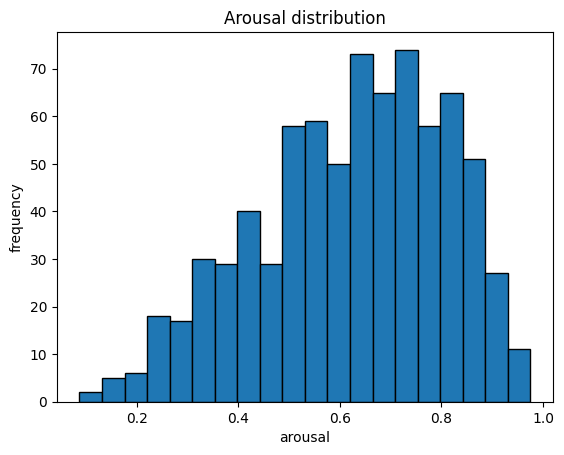

In [17]:
import matplotlib.pyplot as plt

plt.hist(static_annotations["Arousal(mean)"], bins=20, edgecolor="black")
plt.xlabel("arousal")
plt.ylabel("frequency")
plt.title("Arousal distribution")
plt.show()


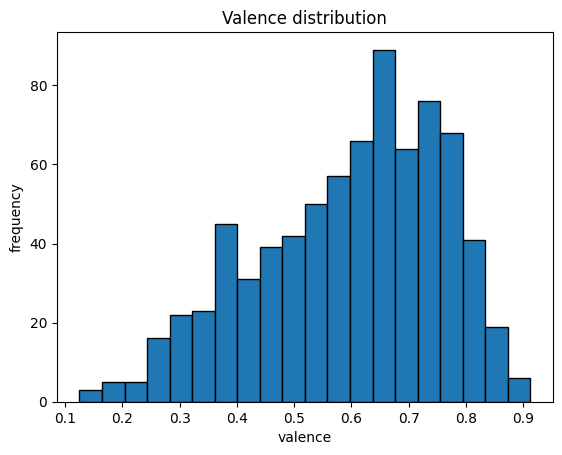

In [18]:
plt.hist(static_annotations["Valence(mean)"], bins=20, edgecolor="black")
plt.xlabel("valence")
plt.ylabel("frequency")
plt.title("Valence distribution")
plt.show()

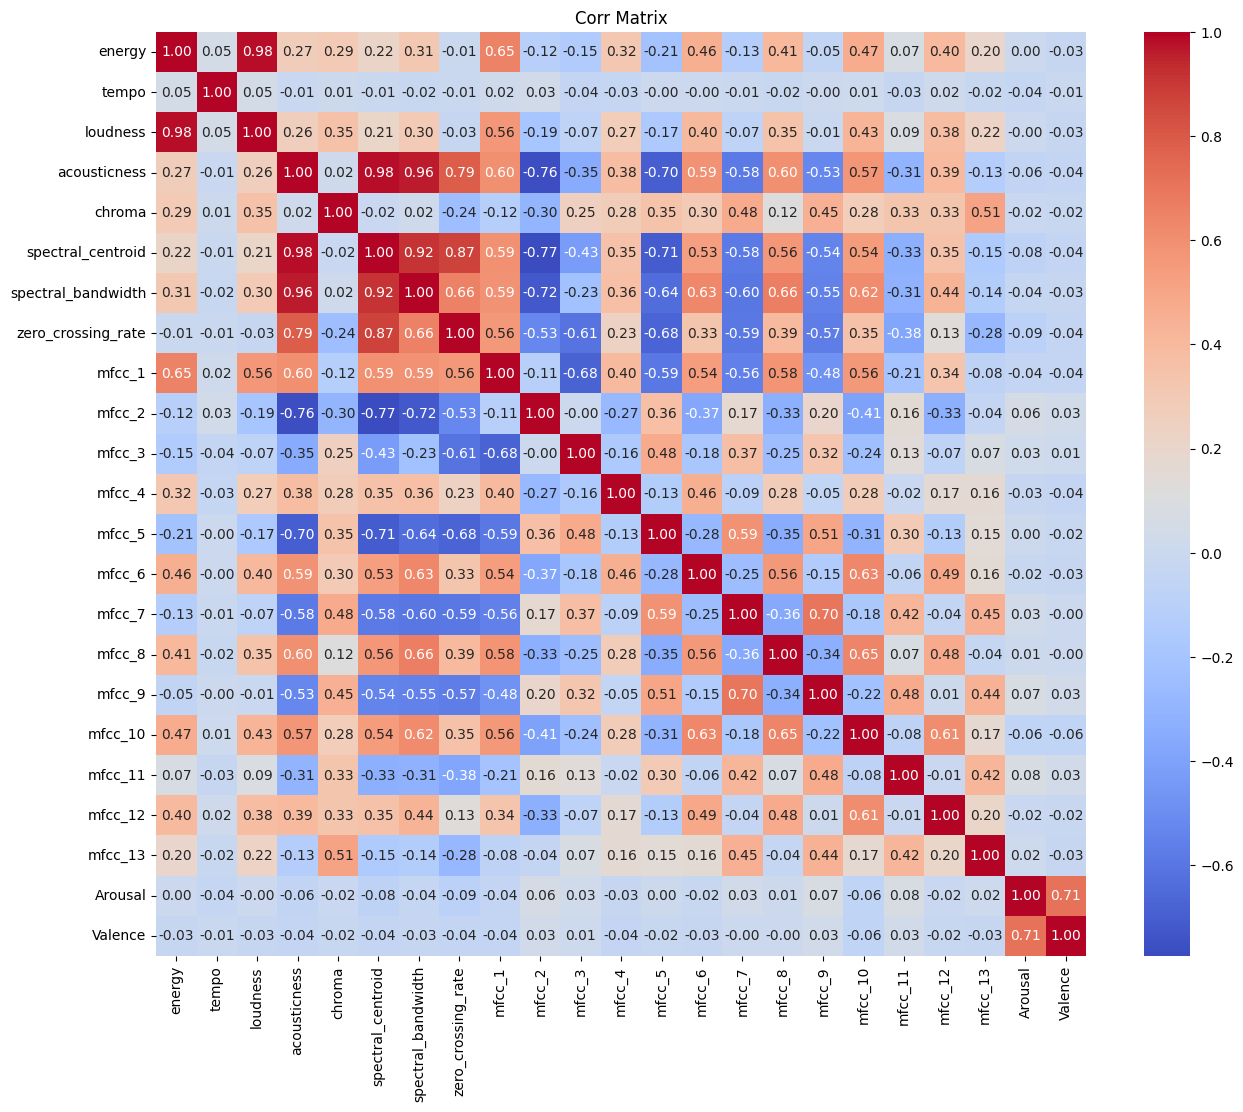

In [19]:
import seaborn as sns
import numpy as np

features_filtered['Arousal'] = static_annotations['Arousal(mean)']
features_filtered['Valence'] = static_annotations['Valence(mean)']
plt.figure(figsize=(15, 12))
sns.heatmap(features_filtered.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corr Matrix")
plt.show()


In [20]:
features_filtered = features_filtered.drop(columns=['Arousal', 'Valence'])
features_filtered

,energy,tempo,loudness,acousticness,chroma,spectral_centroid,spectral_bandwidth,zero_crossing_rate,mfcc_1,mfcc_2,...,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
546,0.167416,129.199219,0.180824,6367.958981,0.441301,3157.773690,3161.221001,0.074769,-140.283450,127.142654,...,44.890960,-27.279469,18.878271,-3.830460,11.120605,-10.312479,2.748767,-1.948506,-1.180146,0.576551
37,0.320777,147.656250,0.360894,3683.720279,0.568148,1723.857250,2476.835544,0.019745,-182.869100,148.384930,...,41.620663,0.989716,15.382587,-6.526820,4.323647,4.485806,-5.900323,3.149099,4.502985,4.729003
629,0.264827,139.674831,0.305350,4735.436632,0.629660,2247.383640,2731.072255,0.038199,-188.143880,129.043170,...,53.391000,6.990583,28.836666,3.364435,4.887687,9.633264,-0.476009,-5.047288,5.153652,4.216983
370,0.272414,139.674831,0.298287,5595.206497,0.638828,2681.820692,2973.294173,0.051718,-147.526660,131.465350,...,46.605724,1.367338,37.255943,-8.841947,11.545364,11.763454,11.312409,-2.658028,11.548718,7.956996
456,0.260707,120.185320,0.282627,7074.409985,0.450676,3273.508644,3491.593486,0.078891,-74.421740,134.728230,...,45.392010,-26.908142,27.400742,-12.692239,6.748195,-9.926186,8.157160,-10.091366,2.335603,0.732696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,0.251102,101.332721,0.286139,8046.508943,0.419782,3701.987271,3817.205128,0.092689,-89.774740,117.534920,...,40.996235,-19.660898,29.811317,-26.077682,18.816692,-9.868566,10.926666,-4.018208,3.160968,0.217830
390,0.259388,123.046875,0.277576,8878.750888,0.471927,4094.112543,3966.422507,0.106443,-54.368343,112.708890,...,38.523880,-40.287083,31.650122,-19.713516,23.373392,-8.985062,12.925376,-4.966484,4.212863,-1.607116
708,0.254730,129.199219,0.290731,9364.032070,0.471670,4352.857065,4090.517493,0.105072,-95.240410,105.873700,...,41.816814,-28.618290,41.943295,-17.932741,21.091143,-7.373431,11.659453,0.371592,7.906636,2.805005
612,0.295985,126.048018,0.334170,9706.734999,0.488043,4655.209390,4204.967720,0.108256,-90.802086,85.734886,...,45.664974,-30.074265,34.450250,-13.388564,25.480713,-10.562430,21.213926,-2.768218,10.813727,0.406941


# AV Regression Model Training

In [17]:
from sklearn.model_selection import train_test_split

y_arousal = static_annotations['Arousal(mean)']
y_valence = static_annotations['Valence(mean)']

X_train, X_test, y_train_arousal, y_test_arousal = train_test_split(features_filtered, y_arousal, test_size=0.1, random_state=111)
X_train, X_test, y_train_valence, y_test_valence = train_test_split(features_filtered, y_valence, test_size=0.1, random_state=111)


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

models = {
    "Ridge": Ridge(),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

param_grid = {
    "Ridge": {
        "alpha": [0.01, 0.1, 1, 10, 100],
    },
    "RandomForest": {
        "n_estimators": [50, 100, 200, 300],
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200, 300],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 10]
    }
}


def train_and_evaluate(model_name, X_train, y_train, X_test, y_test):
    model = models[model_name]
    grid = GridSearchCV(model, param_grid[model_name], scoring="neg_mean_absolute_error", cv=3, verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    print(f"Best {model_name}: {grid.best_params_}")


    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE{model_name}: {mse:.4f}")
    
    return best_model

# Train for arousal
print("Train for arousal")
best_arousal_models = {name: train_and_evaluate(name, X_train, y_train_arousal, X_test, y_test_arousal) for name in models}

# Train for valence
print("Train for valence")
best_valence_models = {name: train_and_evaluate(name, X_train, y_train_valence, X_test, y_test_valence) for name in models}


Train for arousal
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Ridge: {'alpha': 0.01}
MSERidge: 0.0137
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best RandomForest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}
MSERandomForest: 0.0135
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
MSEXGBoost: 0.0126
Train for valence
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Ridge: {'alpha': 0.01}
MSERidge: 0.0178
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
MSERandomForest: 0.0171
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
MSEXGBoost: 0.0176


In [19]:
import joblib

#Save trained models
joblib.dump(best_arousal_models["XGBoost"], "/kaggle/working/best_arousal_xgboost.pkl")
joblib.dump(best_valence_models["XGBoost"], "/kaggle/working/best_valence_xgboost.pkl")


['/kaggle/working/best_valence_xgboost.pkl']